In [1]:
model_path = '/home/ec2-user/autoencoding_beyond_pixels/out/1.celeba_reconganweight1.0e-06_recondepth9_nodisaerecon/arch.pickle'

In [2]:
import pickle
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import deeppy as dp

In [3]:
import model.aegan
with open(model_path, 'rb') as f:
    model = pickle.load(f)

In [5]:
# size of latent z vector in model
n_hidden = model.latent_encoder.n_out

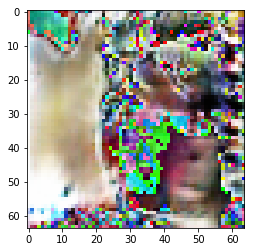

In [6]:
# draw a normal sample from z
num_samples = 1
samples_z = np.random.normal(size=(num_samples, n_hidden))
samples_z[0] = np.array([ 0.27299746, -0.08355912, -1.7695737 , -0.31688056, -1.87317517,
        0.55320203, -0.99189368, -0.90941685, -0.45174206, -0.50354706,
       -1.20191315, -0.64826287,  0.13931351,  0.60185411, -0.23979238,
       -0.14973769,  2.63413838, -0.46535583, -2.17356634, -1.44963098,
       -0.11663572,  1.33871671,  1.26932903, -0.65140522,  0.76026986,
       -0.32183152,  1.5053633 ,  0.36991635, -0.58651531, -2.01247354,
        1.65725889, -0.55023132, -1.19162264,  0.01275715, -1.32969114,
       -0.37220436,  0.96428072,  0.43055837,  0.5166402 ,  0.64185686,
        1.17351967,  2.7720686 ,  0.55928026, -0.52080662,  0.85875413,
        0.40261845, -0.83135401, -0.75881171, -0.21756428,  0.53951548,
        1.16180409, -2.00807301,  0.55049535,  0.29281857,  0.64521343,
        0.05870498, -0.05712517, -0.68844097, -1.28483367,  0.63965791,
        0.1147829 , -0.84191139, -1.67114206, -2.42307204, -0.04990495,
       -1.37435106,  0.60991636,  0.49477083, -1.43940153, -0.83482928,
        0.99590052, -1.54305928,  0.29587883, -1.18663818, -0.10782872,
       -2.42447801,  1.0111437 , -0.17381685,  1.93913711, -0.11480695,
        1.64294169,  1.44366054,  0.51254606,  0.34699177, -0.9909167 ,
        0.72208832, -0.14174679, -0.52573956, -0.54166466, -1.26681573,
        1.15852674,  0.78109296,  0.1841023 , -1.27298884,  0.26875508,
       -0.5273753 ,  0.19372169, -0.20865813, -1.10899354, -1.92834819,
       -0.05431307,  0.20040296,  0.47268649,  0.62817559, -1.6337148 ,
       -0.88946453,  0.38230307,  1.76499411,  0.29270106,  0.58946889,
        0.31293236,  0.29306247, -0.87989622,  0.49777886, -0.67325626,
       -1.03714517, -0.40535031, -0.12561605,  0.0337917 , -1.13667884,
       -1.53343195,  1.25694634,  1.24506072, -0.24863862, -1.82588661,
       -1.50391033,  1.1843021 , -0.17187887])
imgs = model.decode(samples_z.astype(dp.float_))
for i in range(num_samples):
    img = imgs[i]
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img)
    plt.show()

In [179]:
from skimage.transform import resize
from skimage.util import crop
import deeppy as dp

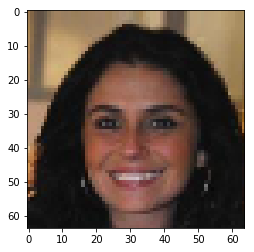

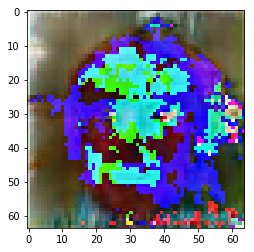

In [227]:
timg = sp.misc.imread('/home/ec2-user/autoencoding_beyond_pixels/datasets/celeba/img_align_celeba/001682.jpg')

# resize image so shorter dim is same as what model expects
dims = np.array(timg[:,:,0].shape)
scale = model_img_size / min(dims)
new_dims = (scale * dims).astype('int_')
img_resized = resize(timg, new_dims)

# now figure out which is longer dim and crop it to what model expects
long_dim = np.argmax(new_dims)
long_dim_len = max(new_dims)
long_crop = int((long_dim_len - model_img_size)/2)
# assume the crop is the first dim
crops = [[long_crop, long_crop], [0, 0]]
# swap if it's not
if (long_dim == 1): crops = list(reversed(crops))
# add a crop of 0 for third dim (which is really the channels dim)
# crop fn wants list of lists, with inner list amount to cut at 
# each edge of the dim
crops = crops + [[0, 0]]
img_cropped = crop(img_resized, crops)

# model wants channels dim first
img_for_model = np.transpose(img_cropped, (2, 0, 1))
imgs_for_model = np.expand_dims(img_for_model, axis=0)
imgs_for_model = imgs_for_model.astype(dp.float_)

decoded = model.decode(model.encode(imgs_for_model))

plt.imshow(img_cropped)
plt.show()

plt.imshow(np.transpose(decoded[0], (1, 2, 0)))
plt.show()